In [3]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<Axes: title={'center': 'Median value of owner-occupied homes'}, ylabel='MEDV'>

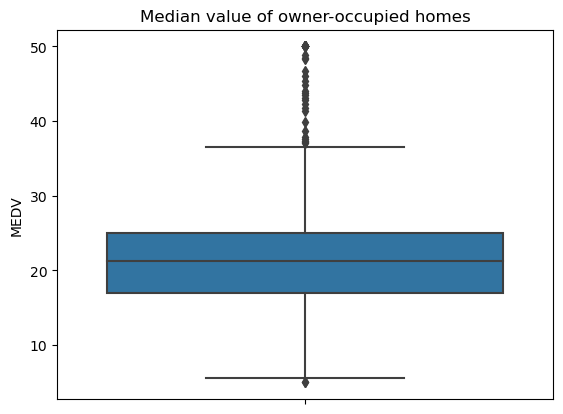

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Task 4
#Q1: For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y=boston_df['MEDV'])
ax.set_title('Median value of owner-occupied homes')
ax

1 if tract bounds river; 0 otherwise


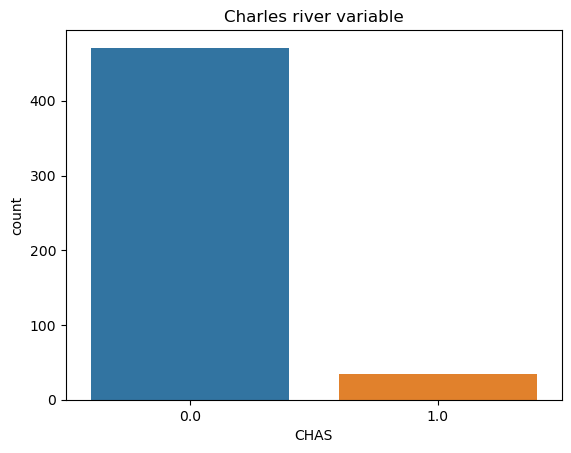

In [14]:
#Q2: Provide a  bar plot for the Charles river variable
bb = sns.countplot(x=boston_df['CHAS'])
bb.set_title('Charles river variable')
print('1 if tract bounds river; 0 otherwise')

Text(0.5, 1.0, 'Median value of owner-occupied homes in $1000s among 3 age groups')

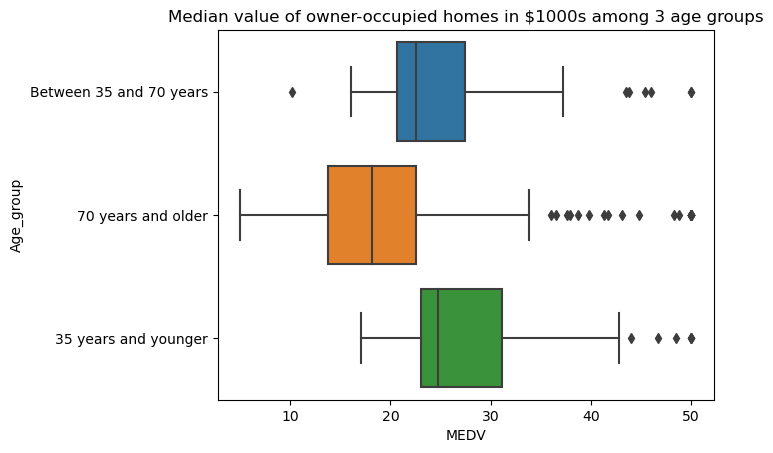

In [21]:
#Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE']<=35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'Age_group'] = '70 years and older'
boston_df

cc = sns.boxplot(x='MEDV',y='Age_group',data=boston_df)
cc.set_title('Median value of owner-occupied homes in $1000s among 3 age groups')

We can see a positive upward-sloping curve according to the scatterplot


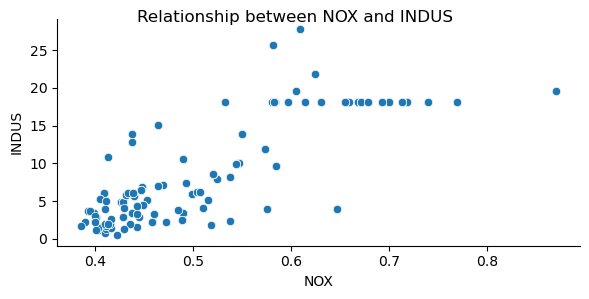

In [28]:
#Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

dd = sns.relplot(x='NOX', y='INDUS', data=boston_df, height=3, aspect=2)
dd.fig.suptitle('Relationship between NOX and INDUS')
print(dd)
print('We can see a positive upward-sloping curve according to the scatterplot')

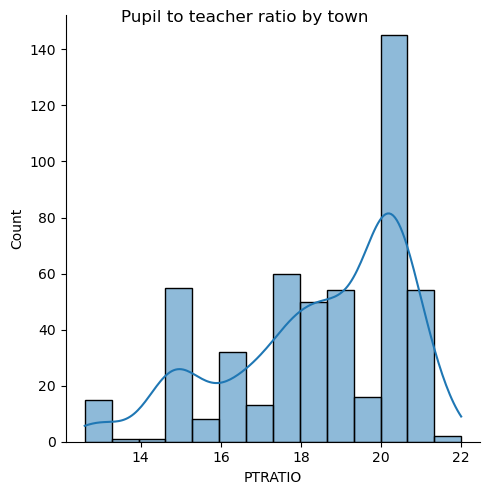

In [32]:
#Q5: Create a histogram for the pupil to teacher ratio variable

ee = sns.displot(boston_df['PTRATIO'], kde=True)
ee.fig.suptitle('Pupil to teacher ratio by town')
ee

In [44]:
import scipy 

#Task 5
#Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#T-test
#H0: u0 = u1 (No significant difference in median value of houses bounded by the Charles river)
#H1: u0 =! u1 (There is significant difference in median value of houses bounded by the Charles river)

#Run levene's test to see the equal or unequal variance
ll = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
print(ll,'population variances are not equal')

tt = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print(tt)
print('p-value=',tt[1])
print('We reject H0 indicating that there is significant difference in median value of houses bounded by the Charles river')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829) population variances are not equal
Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)
p-value= 0.003567170098137517
We reject H0 indicating that there is significant difference in median value of houses bounded by the Charles river


In [52]:
#Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
#ANOVA
#H0: uA = uB = uC (No significant difference) 
#H1: At least one mean differs (There is significant difference) 

thirtyfive_lower = boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_group'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_group'] == '70 years and older']['MEDV']

kk = f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(kk)
print('p_value:',kk[1])
print('Reject H0, indicating that there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')

# boston_df

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
p_value: 1.7105011022702984e-15
Reject H0, indicating that there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


In [57]:
#Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#Pearson Correlation
#H0: No correlation
#H1: Correlated

pp = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pp)
print('p-value:', pp[1])
print('According to p-value, we rejected the H0, which means there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')

#boston_df

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061229697e-98)
p-value: 7.913361061229697e-98
According to p-value, we rejected the H0, which means there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [63]:
#Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
#Regression analysis

import statsmodels.api as sm

x=boston_df['DIS']
y=boston_df['MEDV']

x=sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

print('The impact:')
print('p-value: 1.21e-08')
print('R-squared: 0.062')

#boston_df

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        23:16:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0